# **Default of Credit Card Clients**

### **Name : Sreeraj S**
### **Organization : Entri Elevate**
### **Date :** [Evaluation Date]

______

## **1. Overview of Problem Statement:**

This project is aimed at predicting the case of customers default payments in Taiwan. With the rise of credit card issuance, banks overextended credit to unqualified applicants, leading to excessive debt accumulation and increased defaults. This crisis impacted consumer confidence and posed challenges for both banks and cardholders.

Effective risk prediction is essential for minimizing financial uncertainty. By analyzing customer transactions, repayment history, and financial data, this project aims to build an automated model to predict credit card defaults. Identifying high-risk customers allows banks to take preventive measures, such as offering alternative repayment options, to reduce potential losses.

## **2. Objective:**
* To compare the predictive accuracy of default probability across multiple machine learning models.

* To assess the effectiveness of different models in estimating the true probability of default rather than just classifying clients into default and non-default groups.

## **3. Data Description:**
### Source:
**Dataset link:** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### Data Description 
* ID: ID of each client
  
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
  
* SEX: Gender (1 = male, 2 = female)
  
* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
  
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
  
* AGE: Age in years

**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)
  
* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)





## **4. Data Collection**

#### Importing Libraries

In [209]:
# Importing libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#### Dataset Loading

In [328]:
df=pd.read_csv('default of credit card clients.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Total No.Of Rows And Columns

In [330]:
df.shape

(30000, 25)

##### *To avoid confusion, the target column "default payment next month" has been renamed to "Default", and "PAY_0" has been renamed to "PAY_1".*

In [334]:
df.rename(columns={'default payment next month' : 'Is_Defaulter'}, inplace=True)
df.rename(columns={'PAY_0' : 'PAY_1'},inplace=True)

In [336]:
pd.set_option('display.max_columns',None)

#### First Five Rows

In [338]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Last Five Rows

In [340]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#### About Columns

In [342]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Is_Defaulter'],
      dtype='object')

#### Data Info

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            30000 non-null  int64
 1   LIMIT_BAL     30000 non-null  int64
 2   SEX           30000 non-null  int64
 3   EDUCATION     30000 non-null  int64
 4   MARRIAGE      30000 non-null  int64
 5   AGE           30000 non-null  int64
 6   PAY_1         30000 non-null  int64
 7   PAY_2         30000 non-null  int64
 8   PAY_3         30000 non-null  int64
 9   PAY_4         30000 non-null  int64
 10  PAY_5         30000 non-null  int64
 11  PAY_6         30000 non-null  int64
 12  BILL_AMT1     30000 non-null  int64
 13  BILL_AMT2     30000 non-null  int64
 14  BILL_AMT3     30000 non-null  int64
 15  BILL_AMT4     30000 non-null  int64
 16  BILL_AMT5     30000 non-null  int64
 17  BILL_AMT6     30000 non-null  int64
 18  PAY_AMT1      30000 non-null  int64
 19  PAY_AMT2      30000 non-n

#### Data Description

In [346]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [348]:
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [350]:
df['Is_Defaulter'].value_counts()

Is_Defaulter
0    23364
1     6636
Name: count, dtype: int64

## **5.Data Preprocessing - Data Cleaning**

In [352]:
df.duplicated().sum()

0

In [354]:
print("Missing values in each column:\n")
df.isnull().sum()

Missing values in each column:



ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Is_Defaulter    0
dtype: int64

Text(0.5, 1.0, 'Missing Values Percentage')

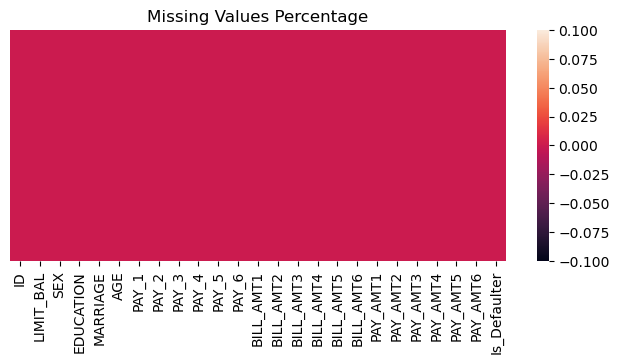

In [356]:
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(),yticklabels=False )
plt.title("Missing Values Percentage")

**Dataset does not contains any NA values, null values and duplicates****

In [358]:
#Dropping ID Column
df = df.drop(['ID'], axis=1)

In [360]:
num_data= df.select_dtypes('number')
num_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [362]:
numeric_columns=list(num_data)
numeric_columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Is_Defaulter']

In [364]:
num_data.skew()

LIMIT_BAL        0.992867
SEX             -0.424183
EDUCATION        0.970972
MARRIAGE        -0.018742
AGE              0.732246
PAY_1            0.731975
PAY_2            0.790565
PAY_3            0.840682
PAY_4            0.999629
PAY_5            1.008197
PAY_6            0.948029
BILL_AMT1        2.663861
BILL_AMT2        2.705221
BILL_AMT3        3.087830
BILL_AMT4        2.821965
BILL_AMT5        2.876380
BILL_AMT6        2.846645
PAY_AMT1        14.668364
PAY_AMT2        30.453817
PAY_AMT3        17.216635
PAY_AMT4        12.904985
PAY_AMT5        11.127417
PAY_AMT6        10.640727
Is_Defaulter     1.343504
dtype: float64

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

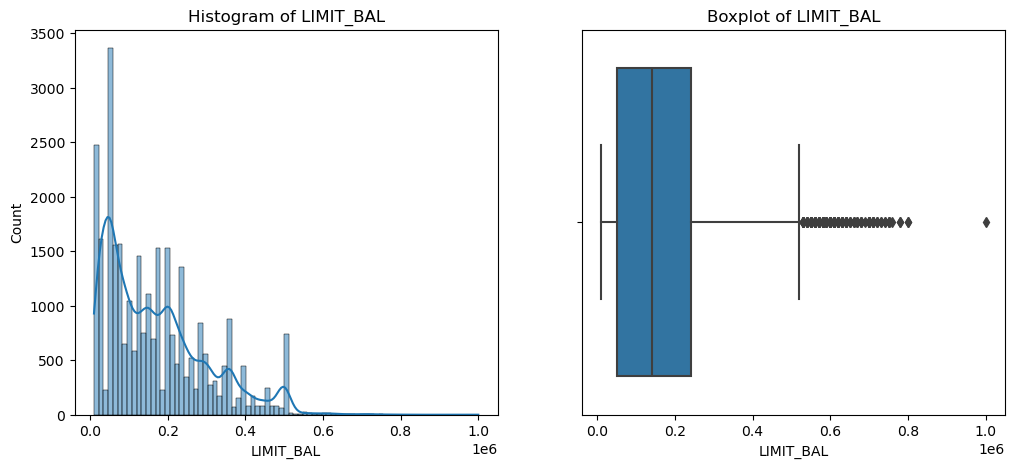

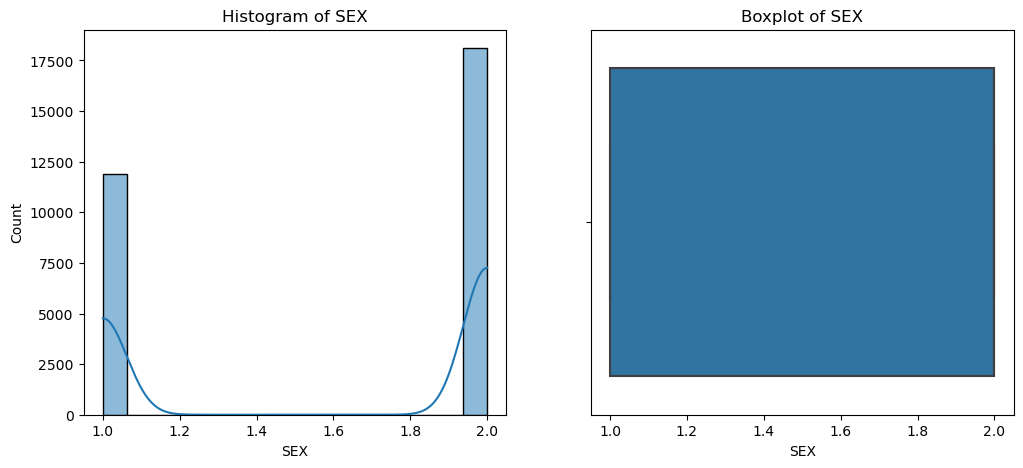

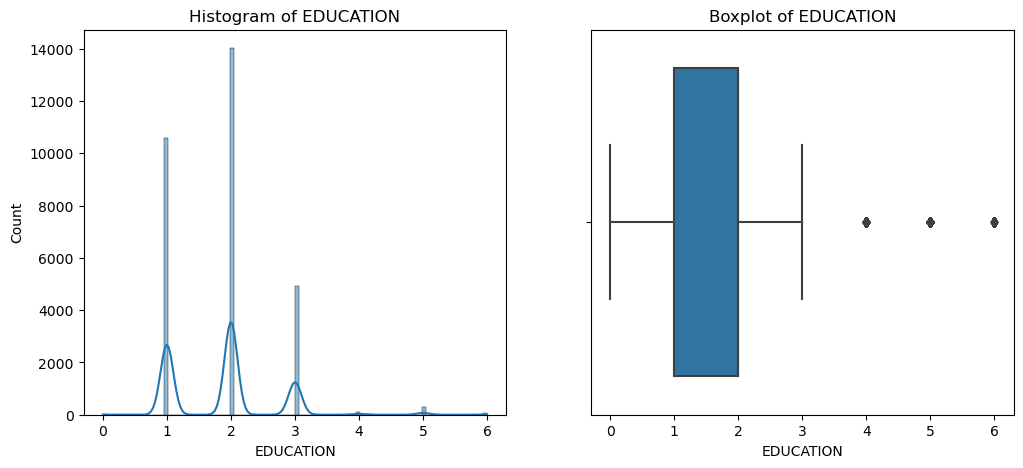

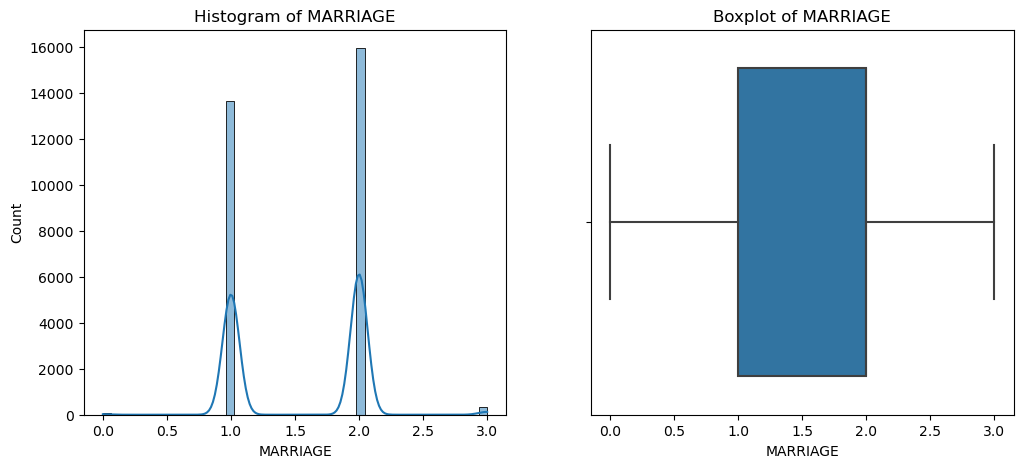

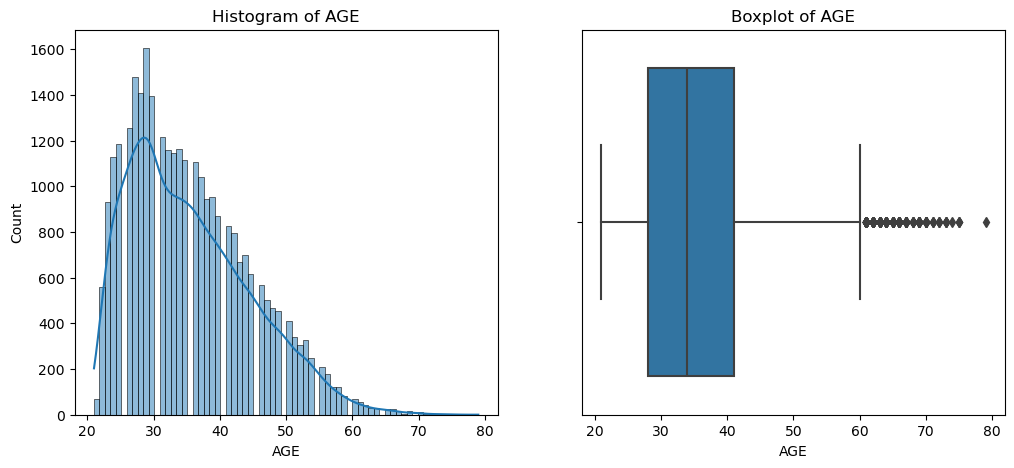

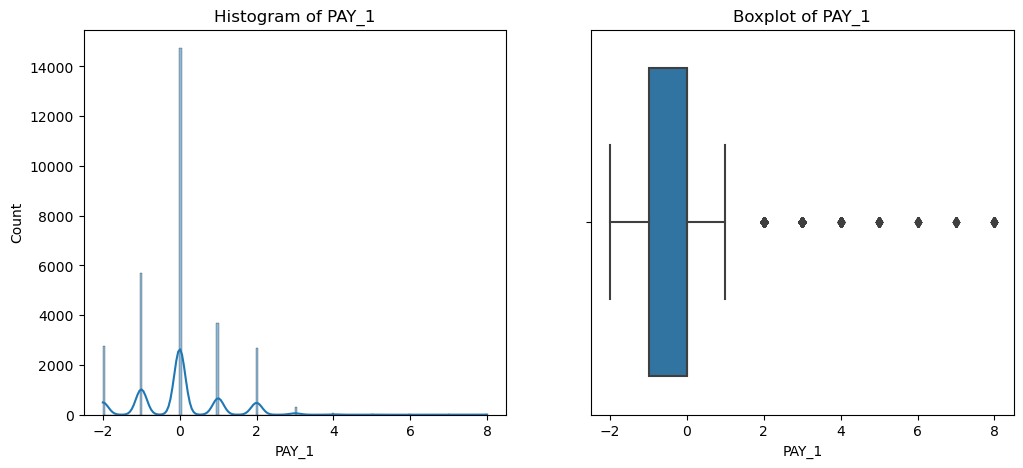

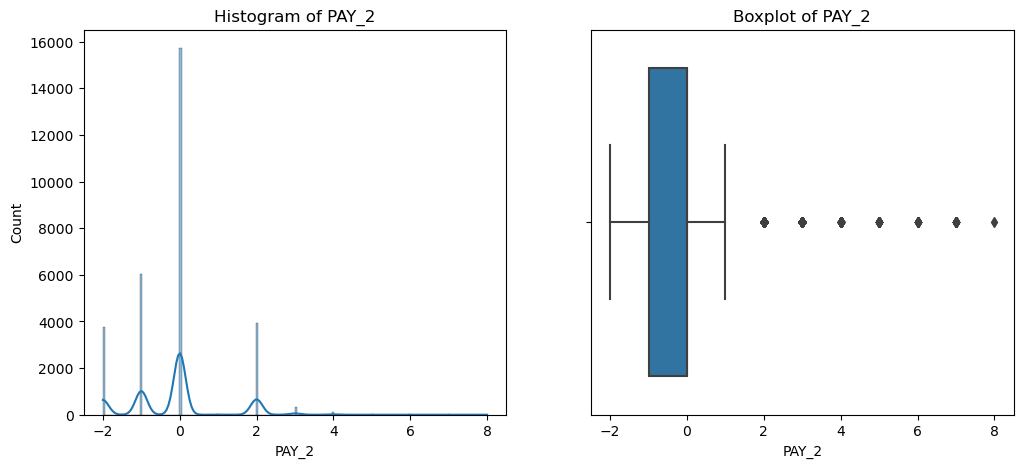

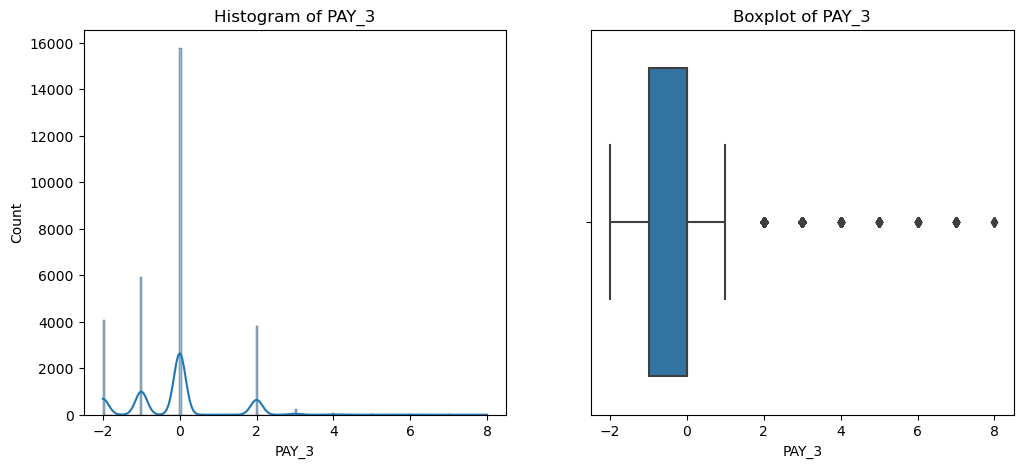

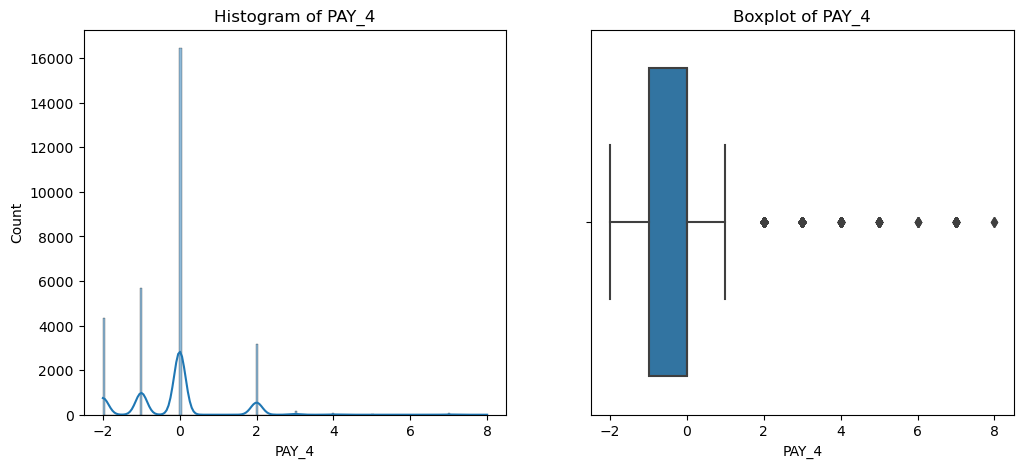

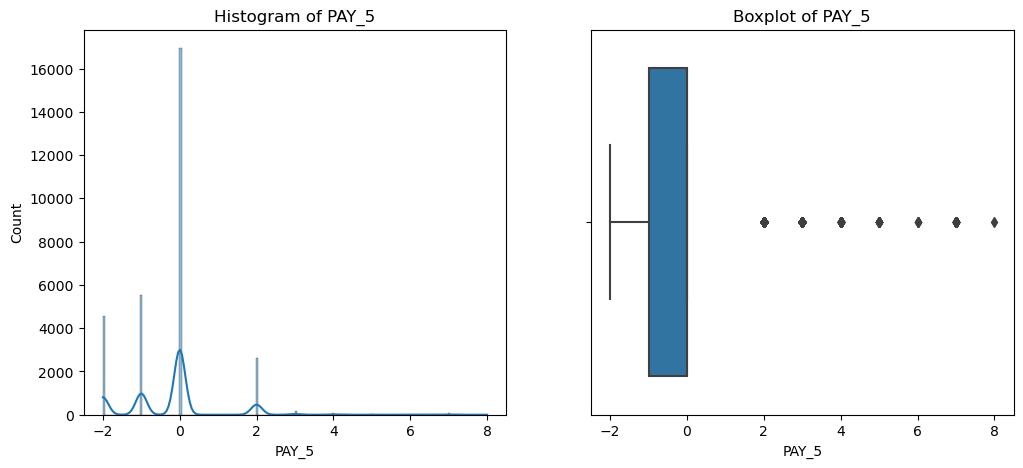

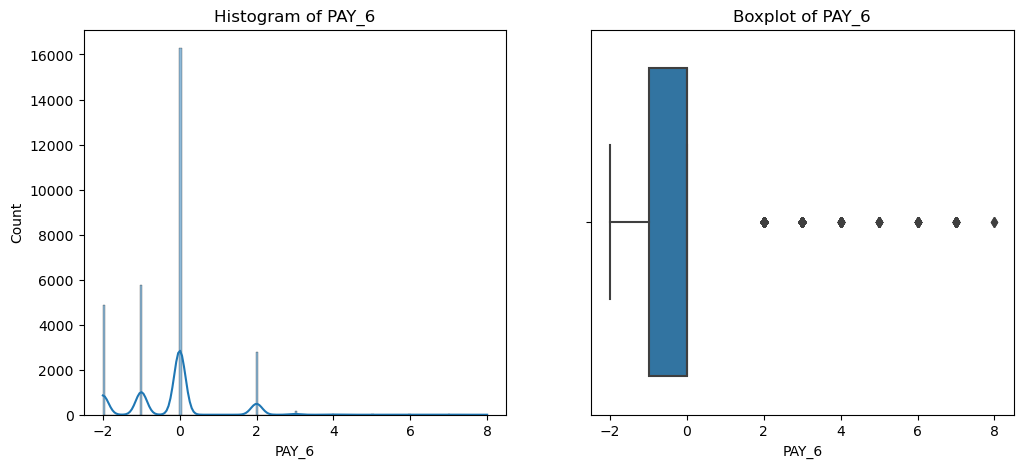

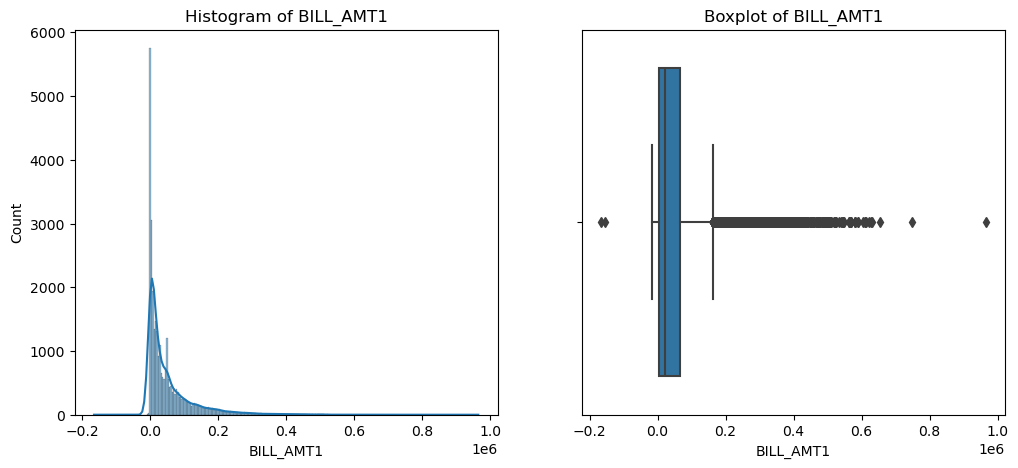

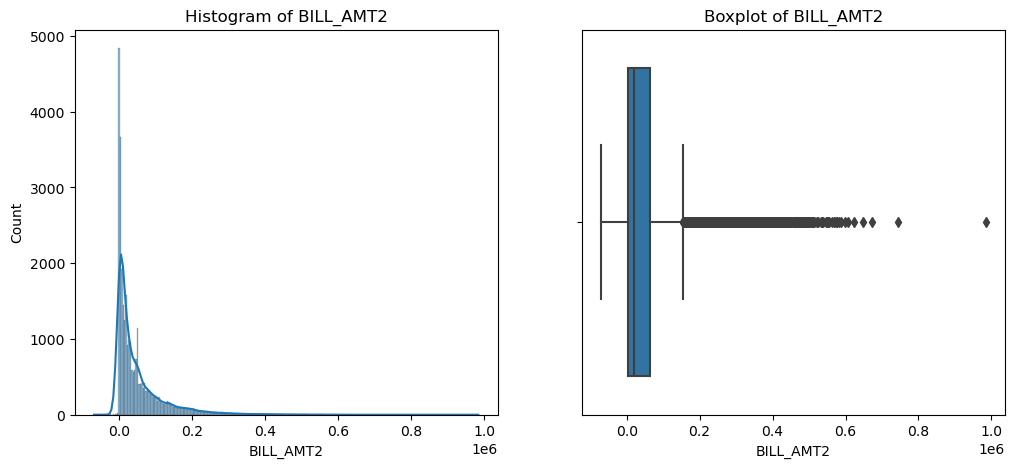

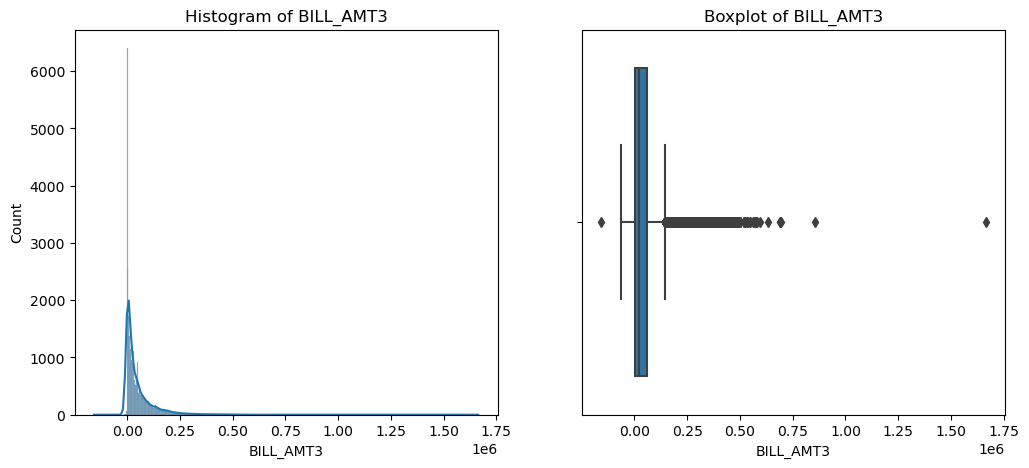

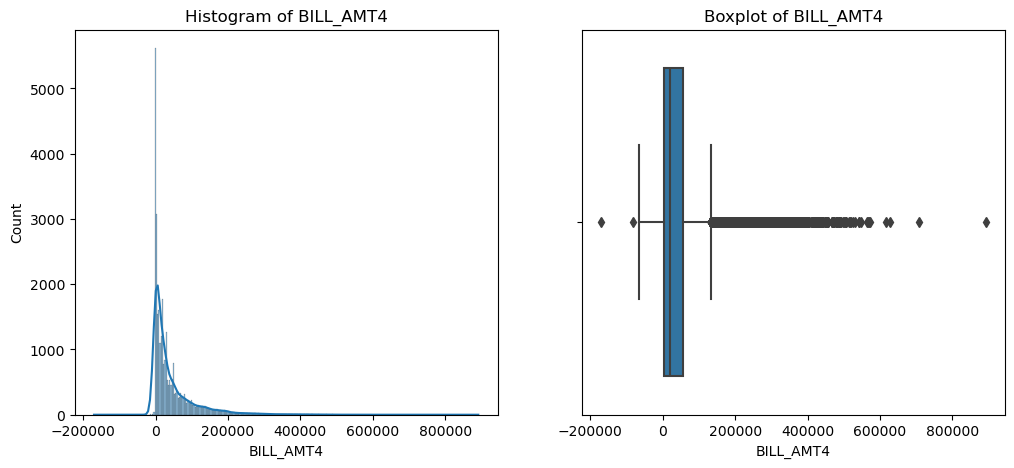

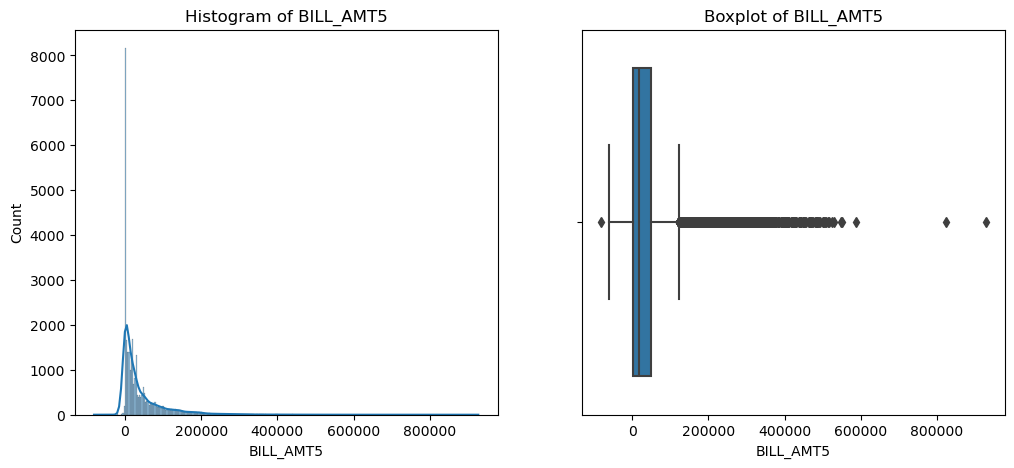

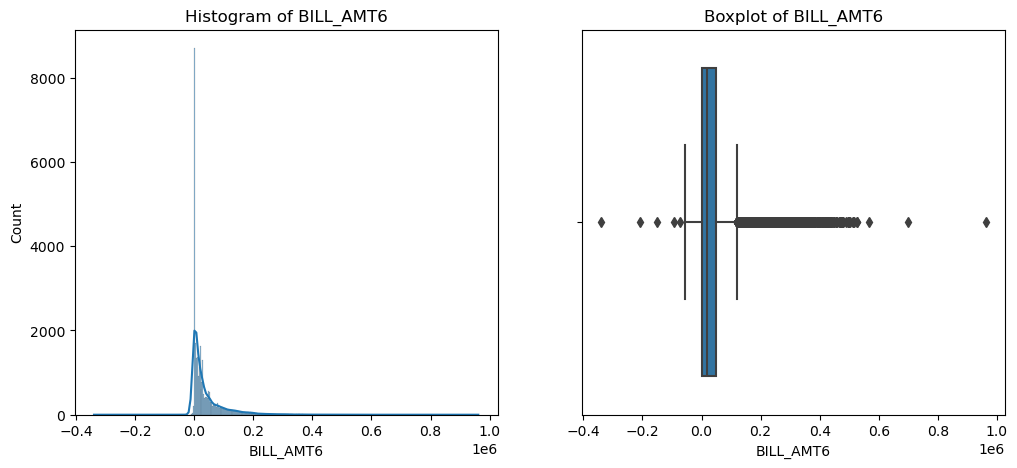

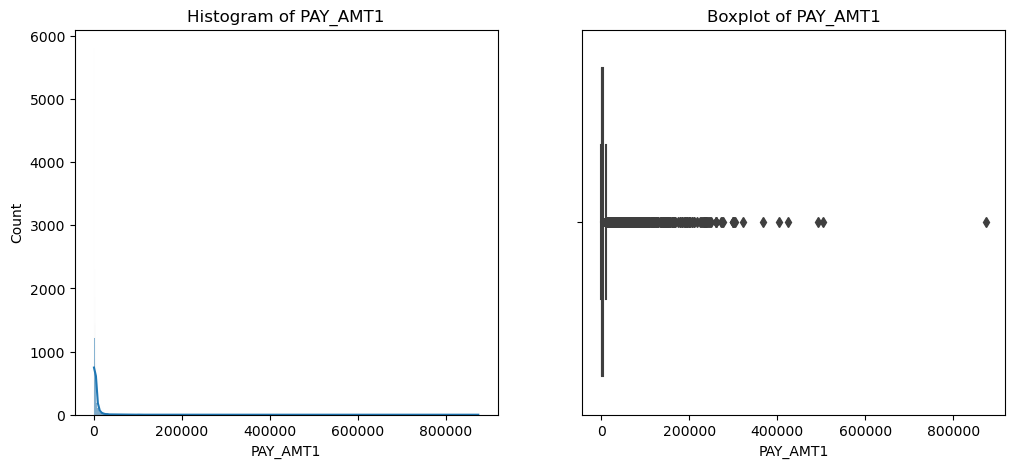

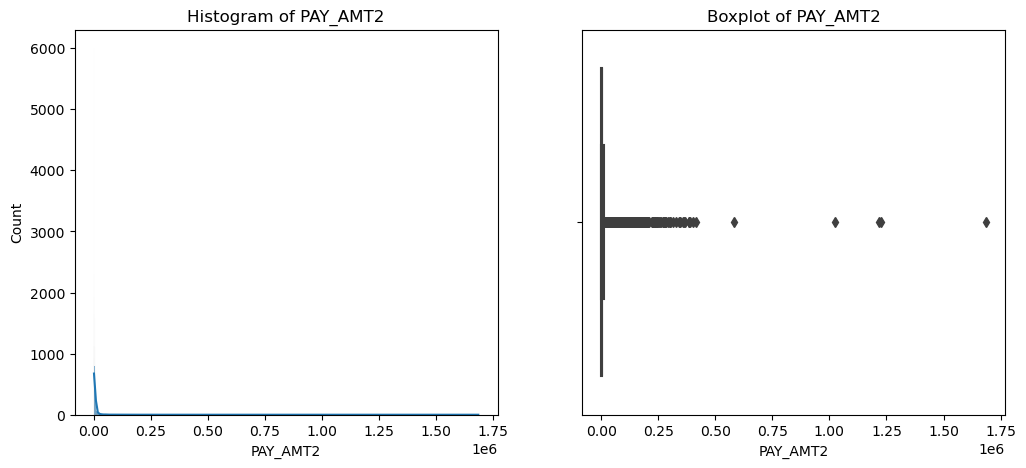

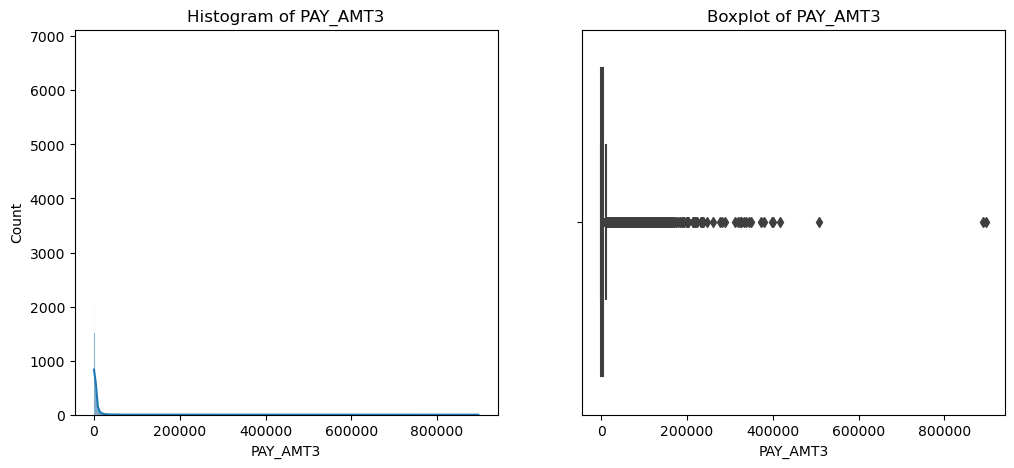

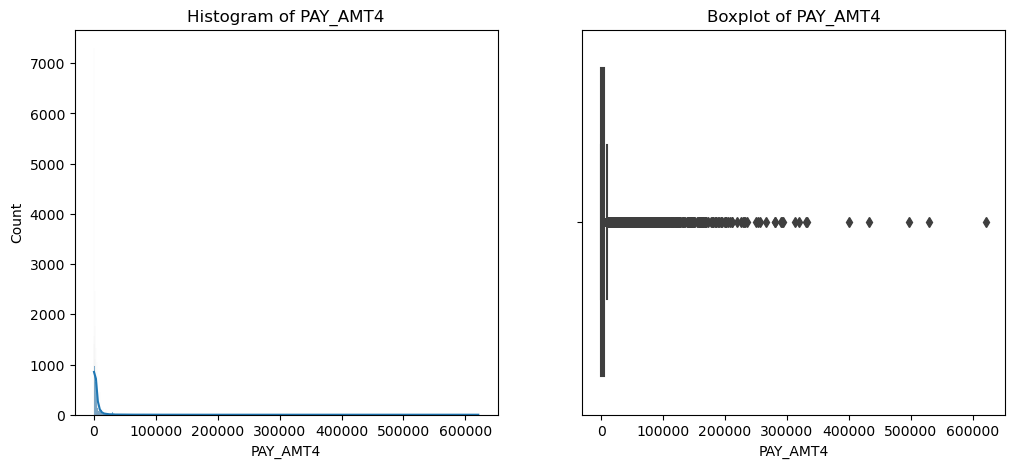

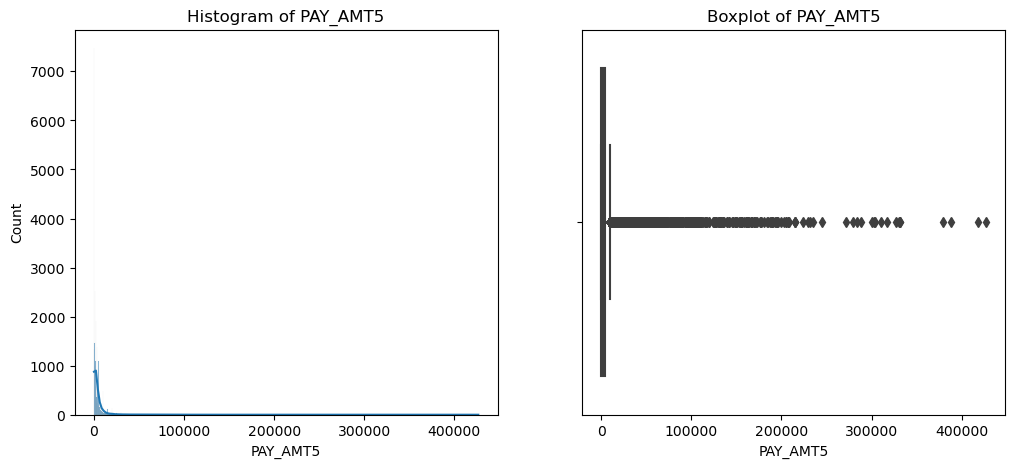

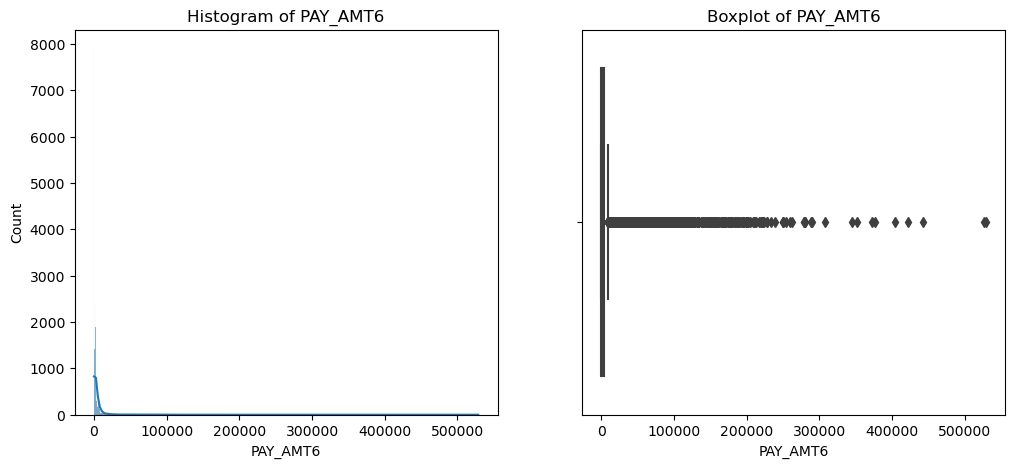

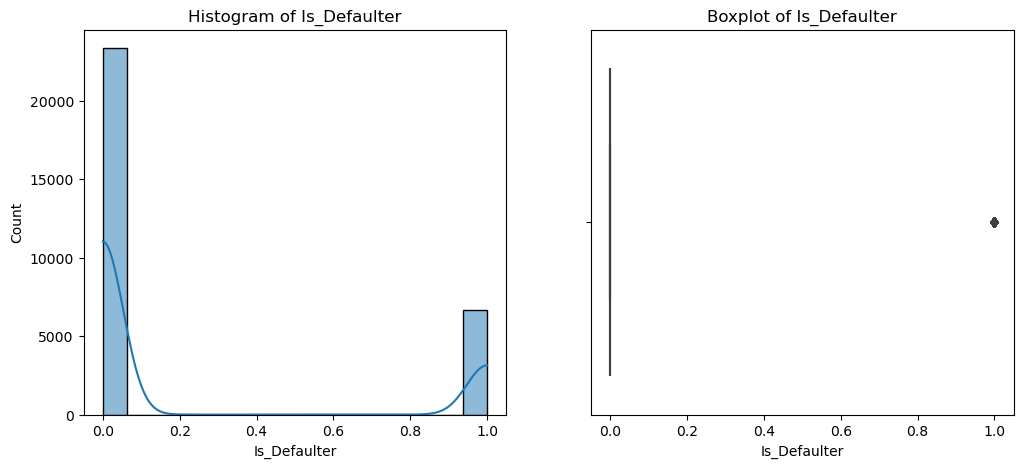

In [366]:
for column in numeric_columns:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

<Axes: >

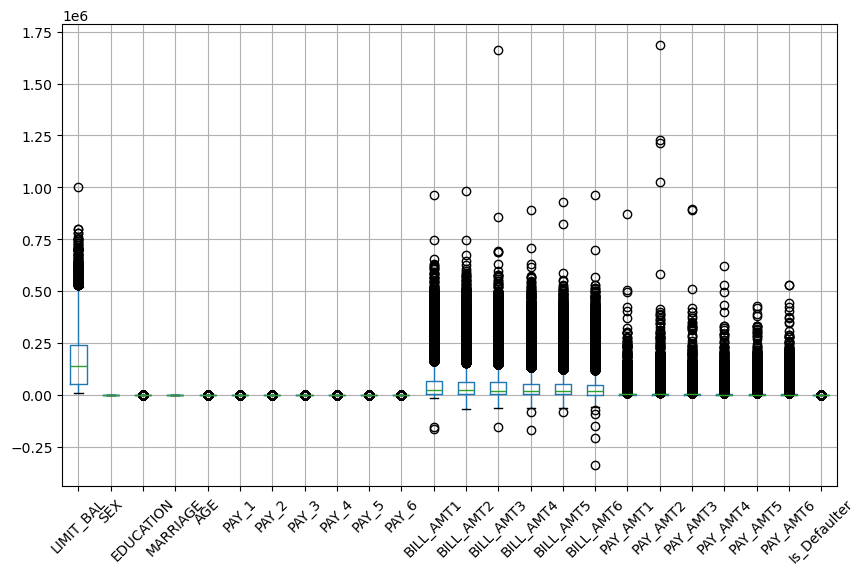

In [367]:
df.boxplot(figsize = (10,6),rot = 45)

#### *The dataset has skewness, so we must handle it.*

### Handling Outliers

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


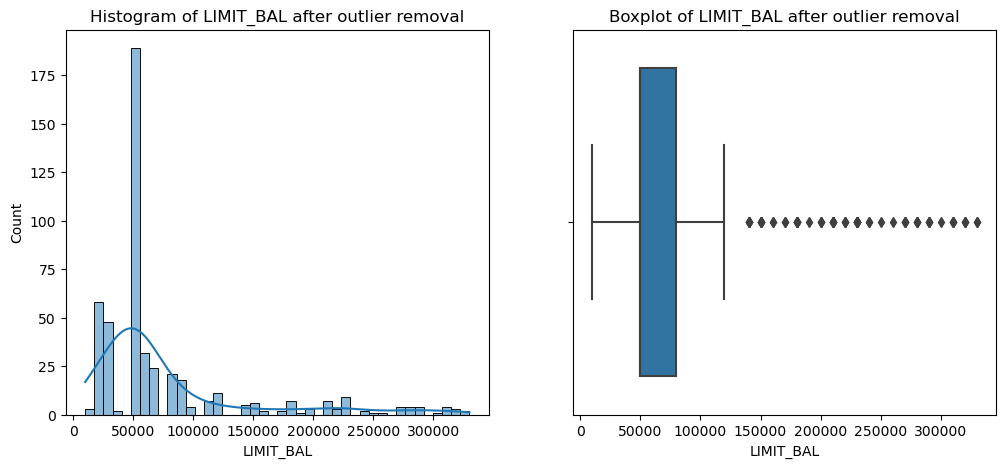

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


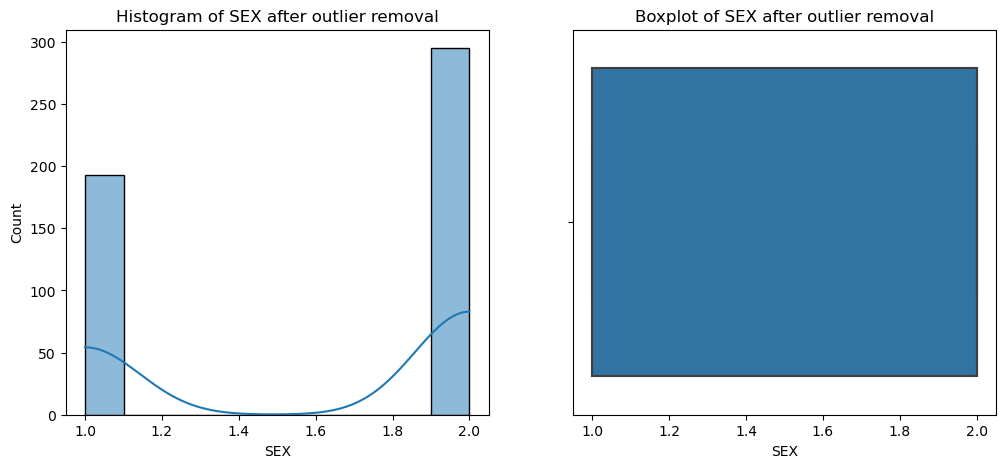

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


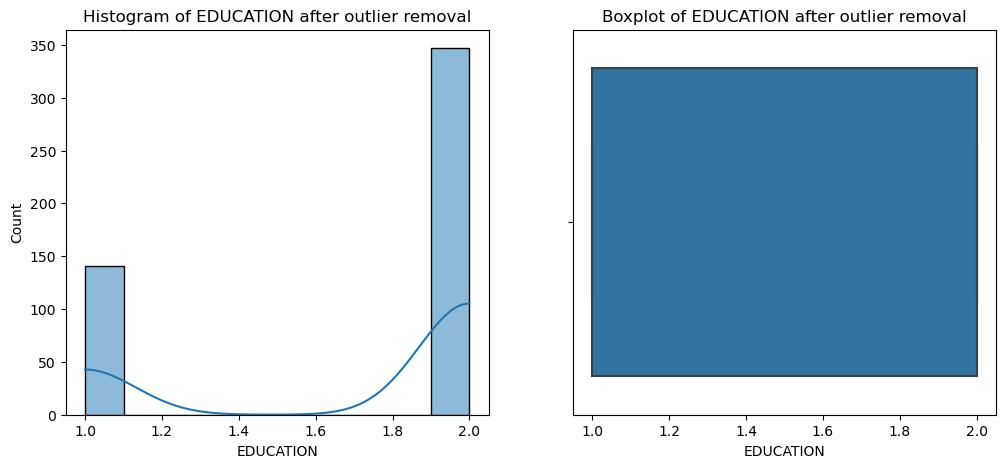

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


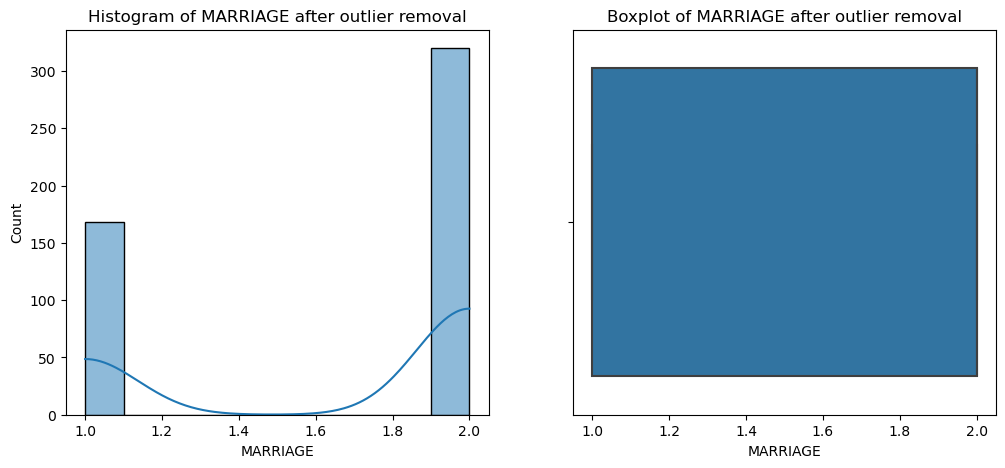

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


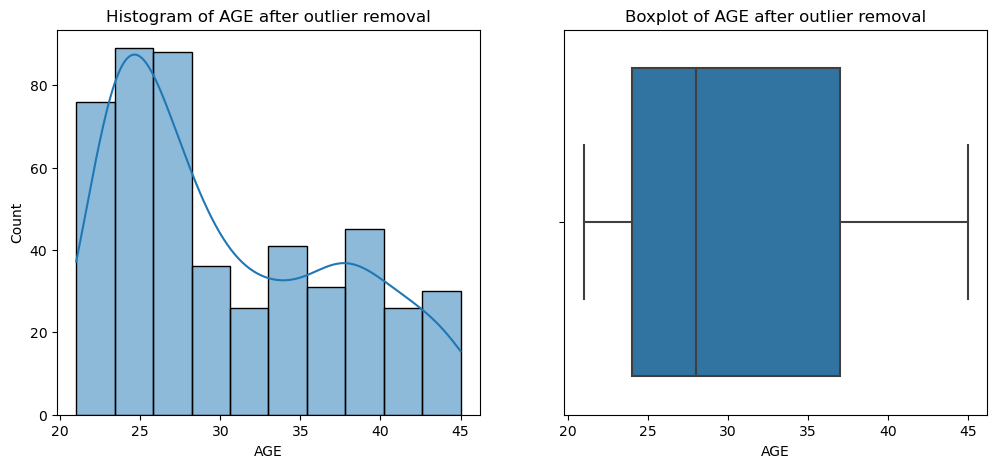

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


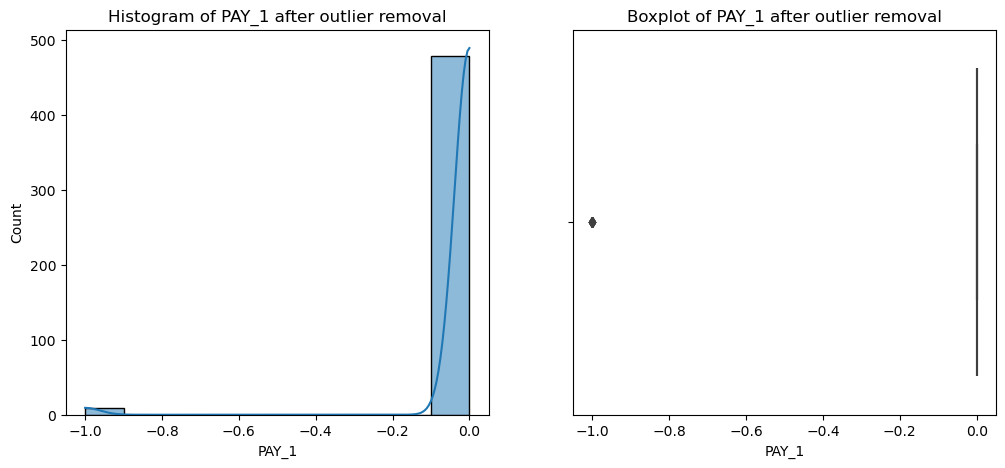

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


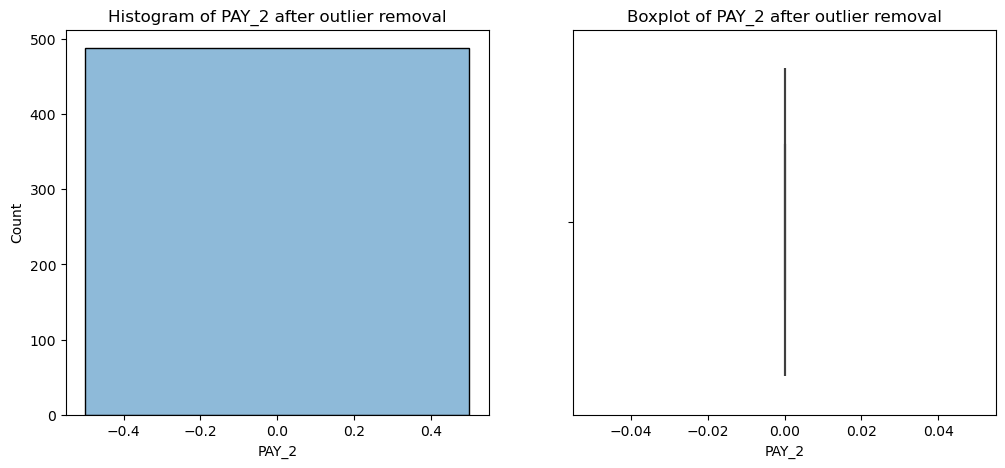

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


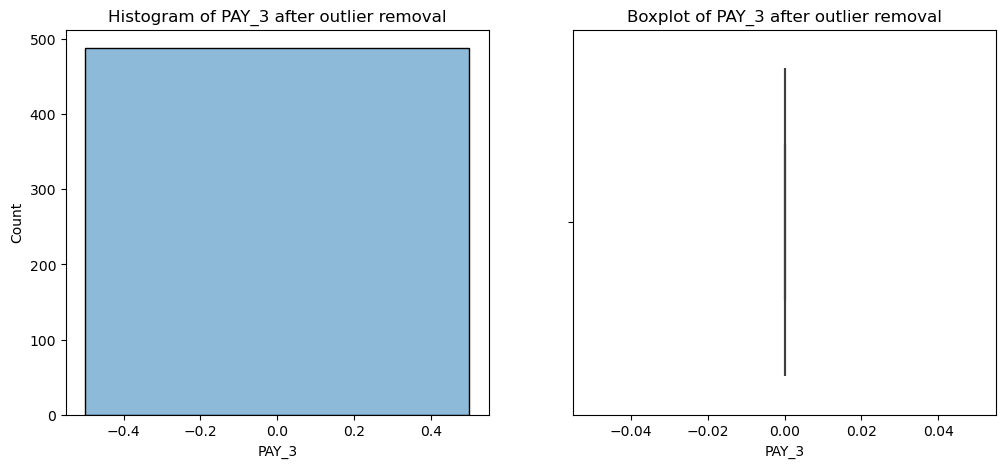

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


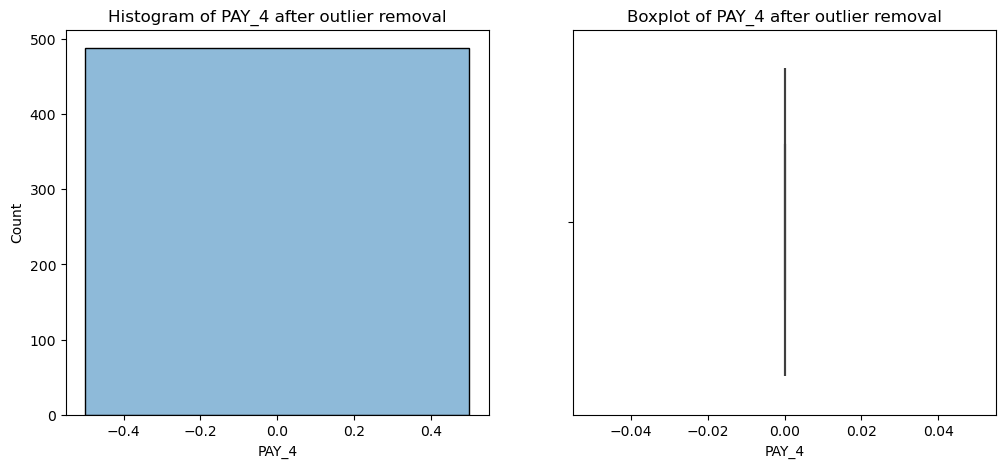

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


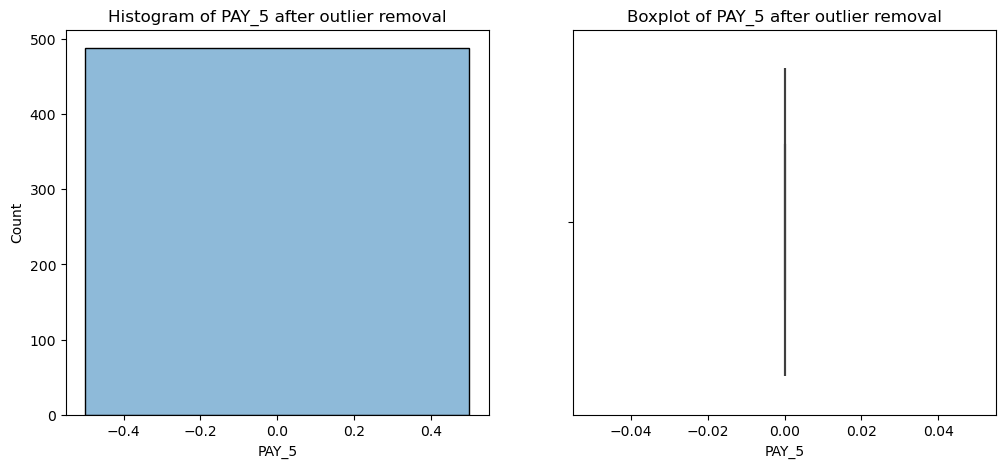

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


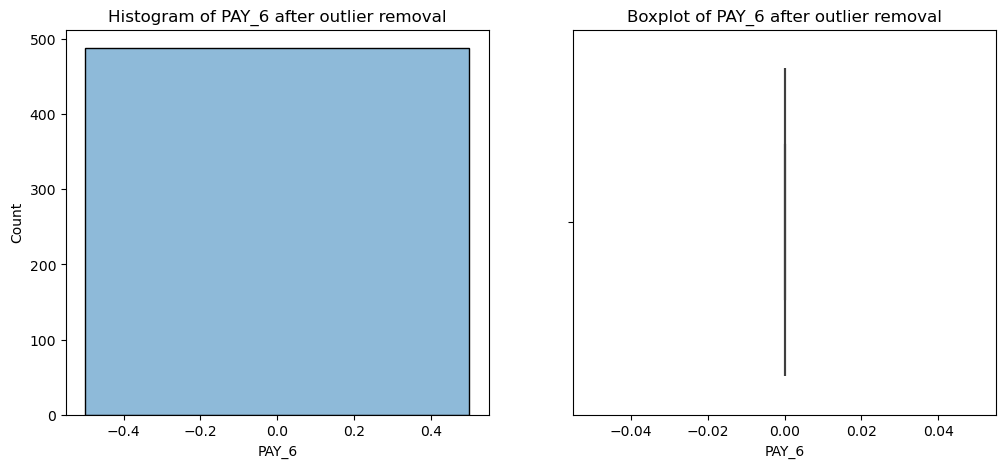

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


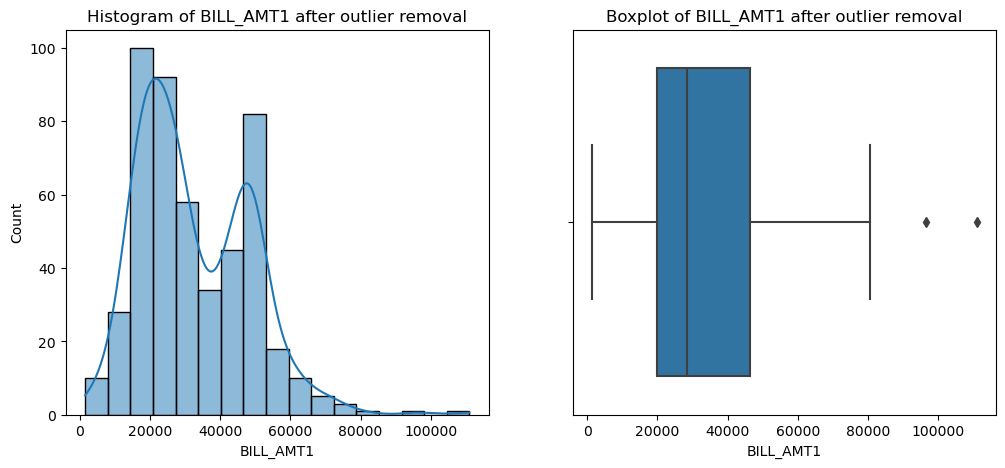

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


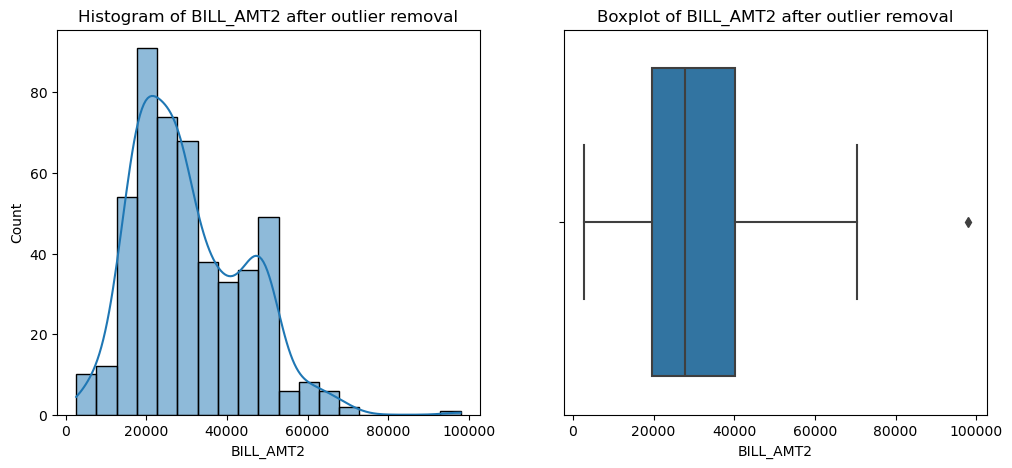

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


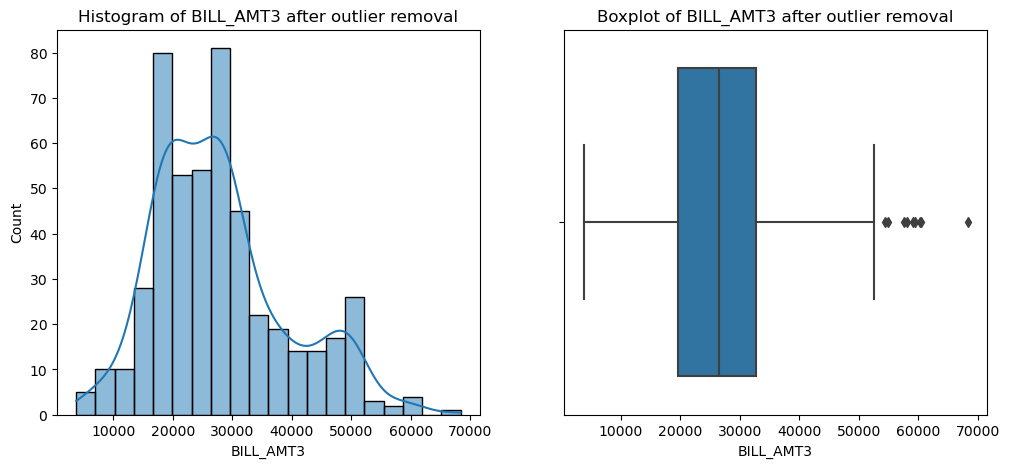

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


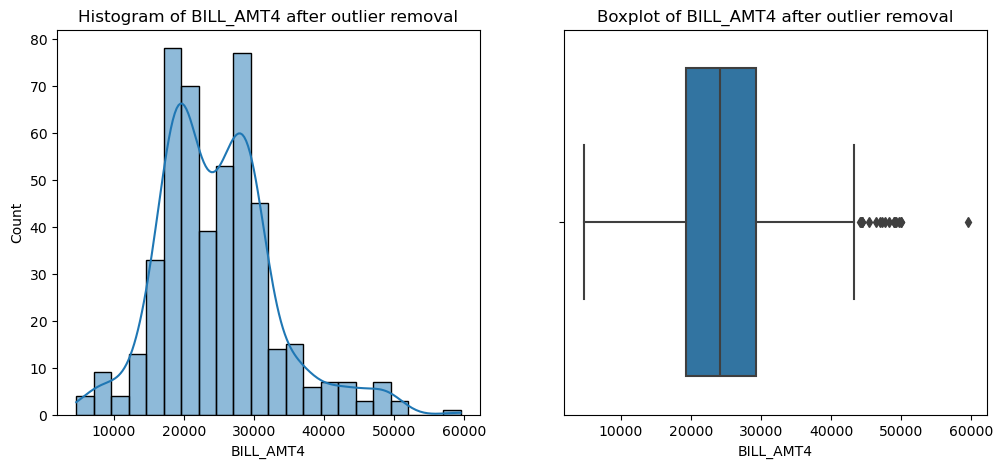

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


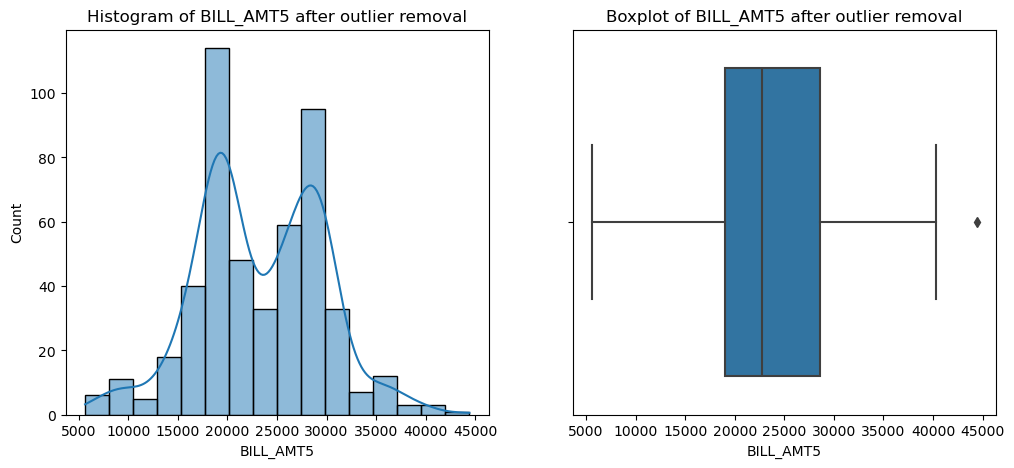

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


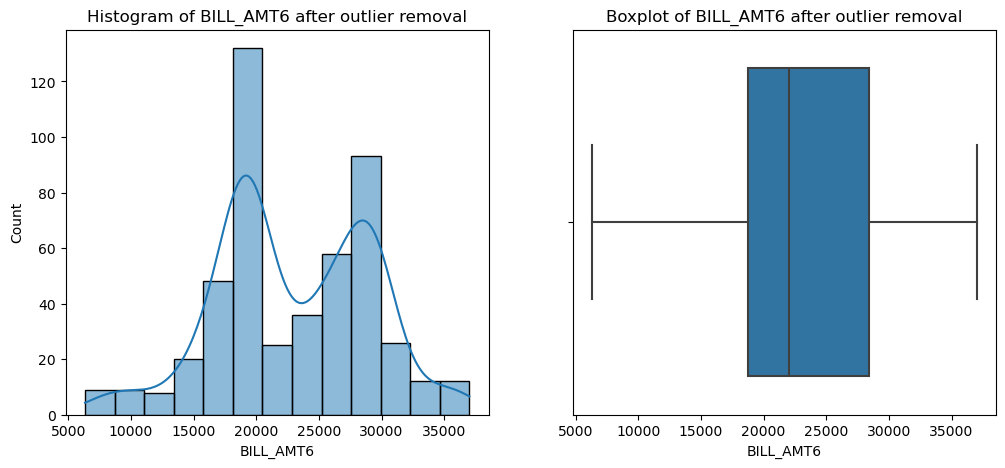

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


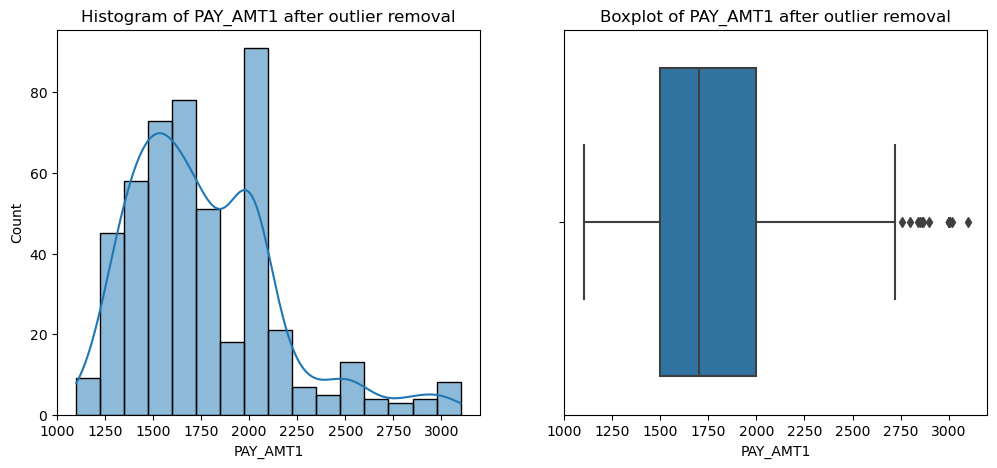

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


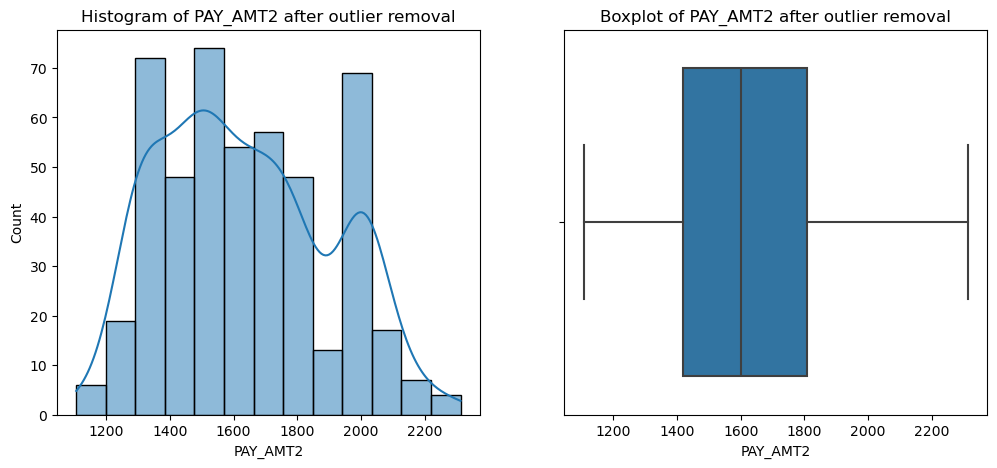

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


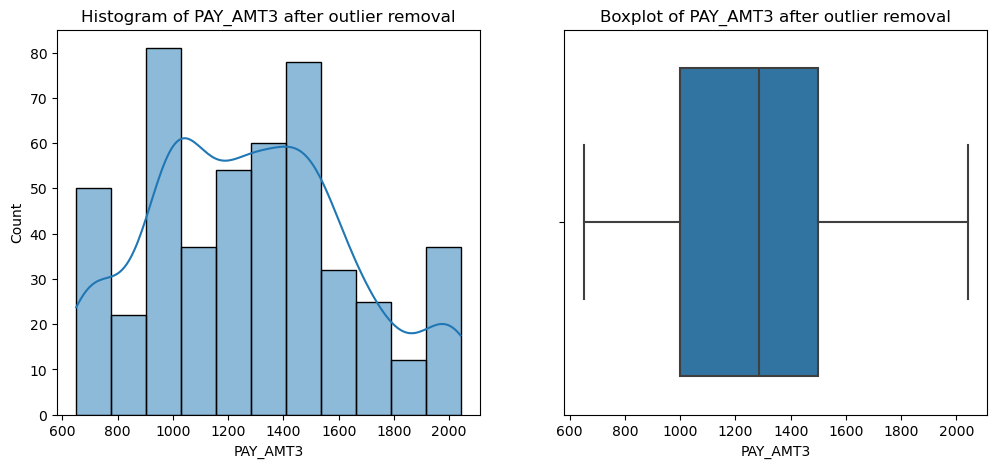

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


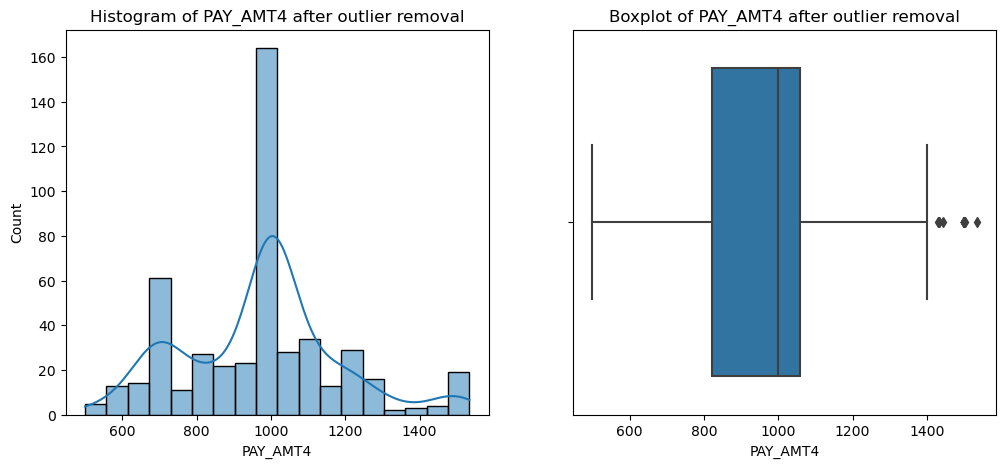

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


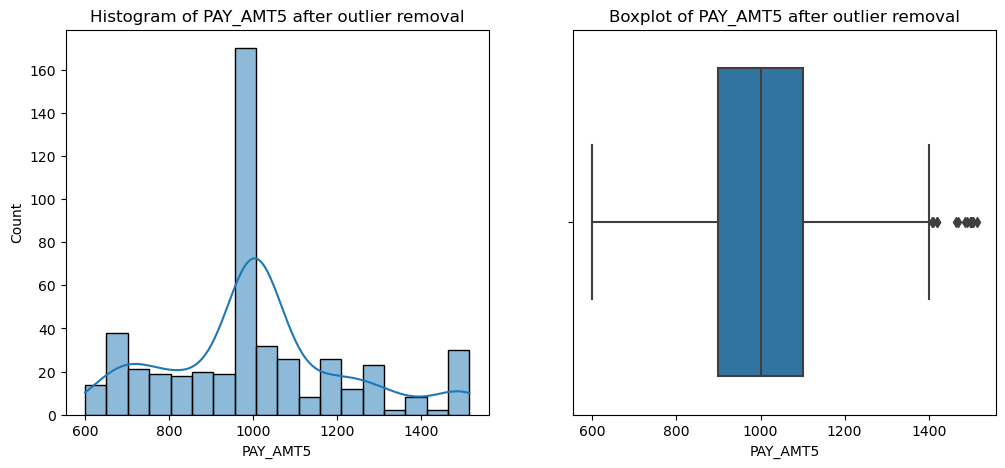

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


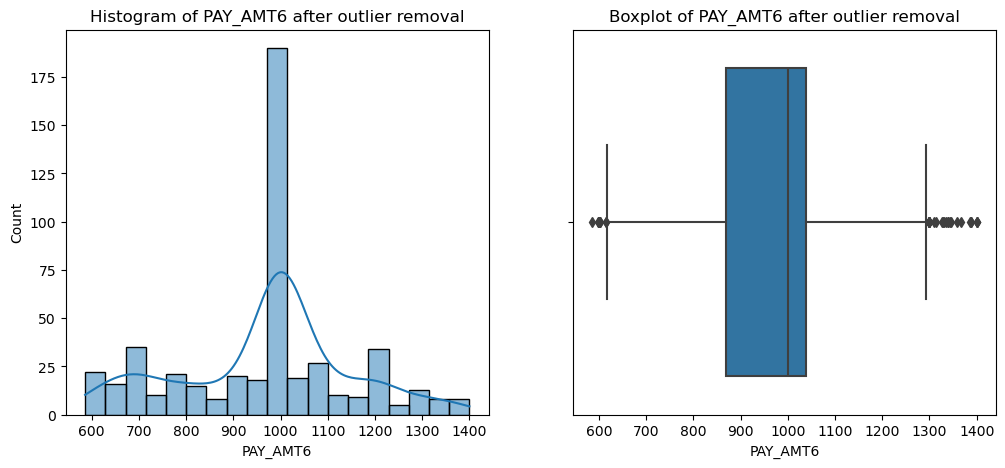

C:\Users\Sooraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


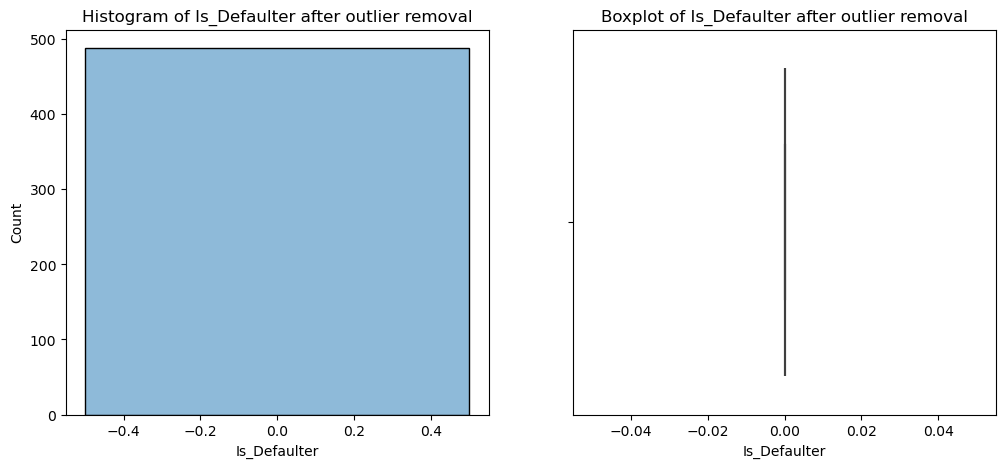

In [371]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - .5 * IQR
    upper_bound = Q3 + .5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return df[(df[column] >= lower_bound) &  (df[column] <= upper_bound)]

# Start with the original data
cleaned_data = df.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

numerical_features = df1.select_dtypes(include=['float64','int64']).columns

In [372]:
cleaned_data.select_dtypes("number").skew()

LIMIT_BAL       2.031488
SEX            -0.428794
EDUCATION      -0.934181
MARRIAGE       -0.657585
AGE             0.603111
PAY_1          -7.180372
PAY_2           0.000000
PAY_3           0.000000
PAY_4           0.000000
PAY_5           0.000000
PAY_6           0.000000
BILL_AMT1       0.761705
BILL_AMT2       0.757676
BILL_AMT3       0.761657
BILL_AMT4       0.769395
BILL_AMT5      -0.002586
BILL_AMT6      -0.107635
PAY_AMT1        1.060058
PAY_AMT2        0.312020
PAY_AMT3        0.241461
PAY_AMT4        0.285044
PAY_AMT5        0.418539
PAY_AMT6       -0.165333
Is_Defaulter    0.000000
dtype: float64

#### *The dataset is still skewed, so we are applying the Yeo-Johnson transformation.*



#### Yeo-Johnson Transformation
The Yeo-Johnson transformation is a power transformation used to make data more normally distributed, improving symmetry and stabilizing variance. It is similar to the Box-Cox transformation but can handle both positive and negative values.

* Works with both positive and negative values.
* Helps meet the normality assumption for statistical models.
* Used in machine learning and statistical analysis to improve model performance.

In [373]:
from sklearn.preprocessing import PowerTransformer

In [377]:
columns_to_transform = [col for col in num_data if col not in ['Is_Defaulter']]

In [379]:
pt=PowerTransformer(method='yeo-johnson')

In [381]:
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

In [383]:
df[columns_to_transform].skew()

LIMIT_BAL   -0.075402
SEX         -0.424183
EDUCATION    0.020768
MARRIAGE    -0.071388
AGE          0.035120
PAY_1        0.030534
PAY_2       -0.012989
PAY_3       -0.000231
PAY_4        0.013038
PAY_5        0.024298
PAY_6        0.031986
BILL_AMT1   -2.448036
BILL_AMT2   -1.310403
BILL_AMT3   -3.235929
BILL_AMT4   -2.821533
BILL_AMT5   -1.323215
BILL_AMT6   -3.025677
PAY_AMT1    -0.133111
PAY_AMT2    -0.112972
PAY_AMT3    -0.151916
PAY_AMT4    -0.165690
PAY_AMT5    -0.178923
PAY_AMT6    -0.175019
dtype: float64

In [385]:
df[columns_to_transform].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   PAY_1      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [387]:
#checking Correlation
cr=df.corr()
cr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
LIMIT_BAL,1.000000,0.059731,-0.256379,-0.115666,0.194751,-0.299563,-0.330706,-0.318988,-0.297606,-0.276228,-0.252992,0.256560,0.241213,0.249349,0.257372,0.254972,0.257996,0.209103,0.213696,0.219255,0.221240,0.234787,0.267728,-0.171332
SEX,0.059731,1.000000,0.017520,-0.031623,-0.094375,-0.059660,-0.073226,-0.068398,-0.060878,-0.054775,-0.043090,-0.031667,-0.031591,-0.021595,-0.017177,-0.011826,-0.013232,-0.011457,-0.001194,0.009180,0.006250,0.008766,0.026660,-0.039961
EDUCATION,-0.256379,0.017520,1.000000,-0.154432,0.143312,0.131024,0.155823,0.148507,0.140286,0.126422,0.110924,0.031322,0.029506,0.023433,0.006980,0.005290,0.002592,-0.018154,-0.021680,-0.017829,-0.018774,-0.028072,-0.032953,0.040479
MARRIAGE,-0.115666,-0.031623,-0.154432,1.000000,-0.439741,0.024885,0.031474,0.038427,0.039784,0.041953,0.039028,-0.016725,-0.012636,-0.020658,-0.016367,-0.021133,-0.018982,0.001873,-0.004204,-0.001861,-0.007553,-0.005159,-0.008583,-0.024429
AGE,0.194751,-0.094375,0.143312,-0.439741,1.000000,-0.063913,-0.077331,-0.078249,-0.074181,-0.077002,-0.068839,0.058080,0.052451,0.052307,0.050278,0.050439,0.052422,0.022701,0.028992,0.020906,0.031990,0.030555,0.034196,0.004128
PAY_1,-0.299563,-0.059660,0.131024,0.024885,-0.063913,1.000000,0.670064,0.590650,0.556349,0.527149,0.495544,0.217684,0.227739,0.211429,0.205720,0.205762,0.196461,-0.105633,-0.073768,-0.050404,-0.029132,-0.016961,-0.031609,0.299171
PAY_2,-0.330706,-0.073226,0.155823,0.031474,-0.077331,0.670064,1.000000,0.800707,0.706049,0.664693,0.618774,0.295989,0.305733,0.280801,0.270512,0.269300,0.253645,-0.016085,0.063522,0.083788,0.088737,0.097405,0.083121,0.230442
PAY_3,-0.318988,-0.068398,0.148507,0.038427,-0.078249,0.590650,0.800707,1.000000,0.807125,0.720376,0.666008,0.265282,0.316601,0.292465,0.281721,0.279105,0.261258,0.205072,0.015476,0.098280,0.112115,0.121145,0.098917,0.206398
PAY_4,-0.297606,-0.060878,0.140286,0.039784,-0.074181,0.556349,0.706049,0.807125,1.000000,0.836936,0.738522,0.259981,0.298830,0.317106,0.307752,0.304605,0.281126,0.166539,0.239249,0.068644,0.137868,0.157406,0.141381,0.187393
PAY_5,-0.276228,-0.054775,0.126422,0.041953,-0.077002,0.527149,0.664693,0.720376,0.836936,1.000000,0.832538,0.257210,0.290783,0.304280,0.334331,0.334035,0.302941,0.150399,0.205987,0.264854,0.107136,0.180294,0.171480,0.175987


Text(0.5, 1.0, 'correlation')

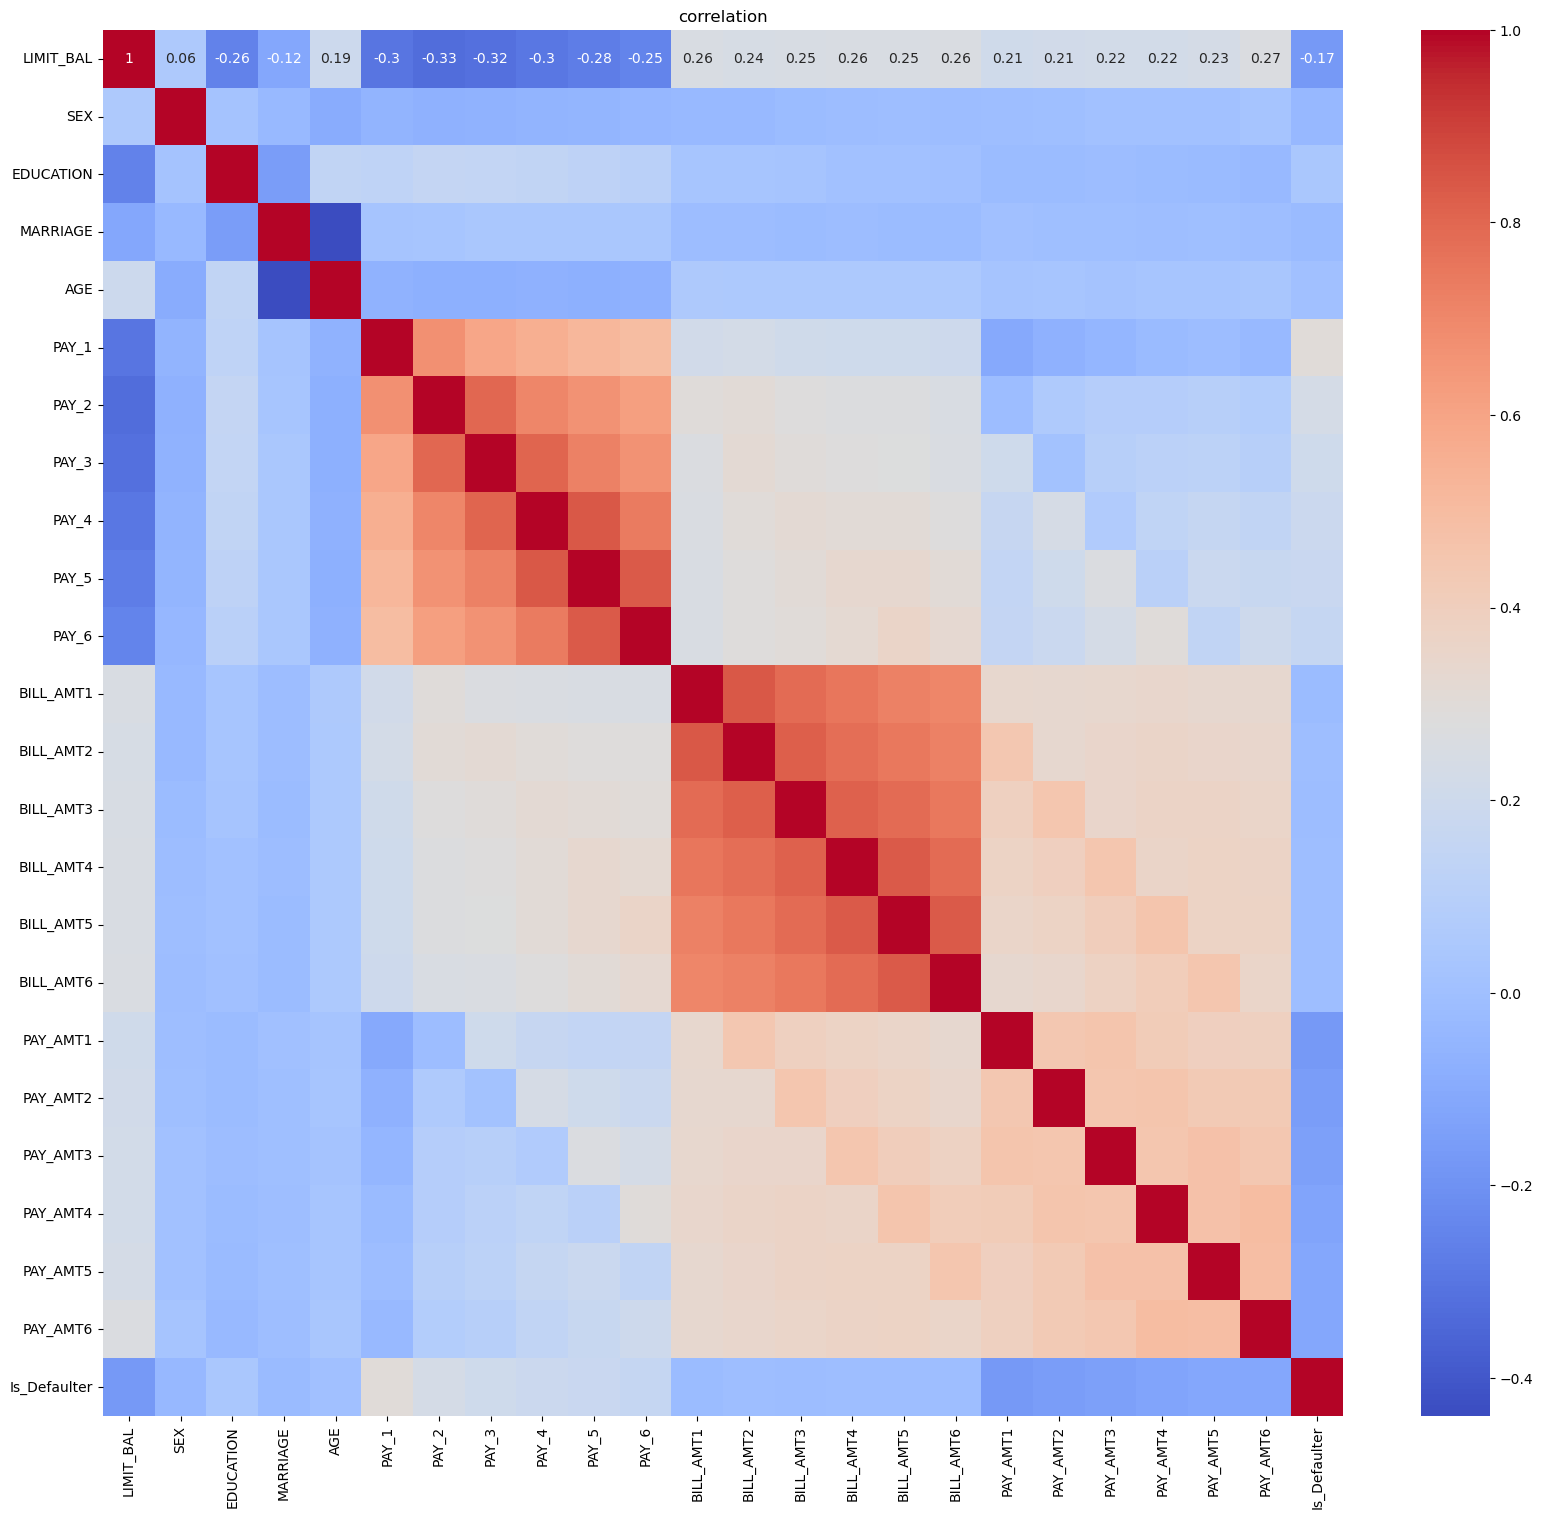

In [389]:
#Visualizing the correlation using a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(cr,annot=True,cmap='coolwarm')
plt.title('correlation')

In [391]:
#checking for replaced labels
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,-1.665383,0.810161,0.362311,-1.058428,-1.505599,1.662431,1.615503,-0.683908,-0.653252,-1.761424,-1.700769,-0.654786,-0.666975,-0.703133,-0.708335,-0.705134,-0.656065,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825,1
1,-0.090364,0.810161,0.362311,0.864100,-1.134225,-0.889837,1.615503,0.259846,0.305873,0.340968,1.785357,-0.679304,-0.700056,-0.655283,-0.624273,-0.604623,-0.580055,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020,1
2,-0.396704,0.810161,0.362311,0.864100,0.016042,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,-0.239392,-0.451718,-0.445706,-0.405640,-0.358103,-0.343748,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487,0
3,-0.953920,0.810161,0.362311,-1.058428,0.349978,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,0.017236,0.089416,0.119568,-0.161996,-0.098021,-0.097838,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121,0
4,-0.953920,-1.234323,0.362311,-1.058428,1.862737,-0.889837,0.234774,-0.683908,0.305873,0.340968,0.360884,-0.568415,-0.611116,-0.082447,-0.287765,-0.277290,-0.279323,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835,0


In [393]:
#Value counts of Is_defaulter
df['Is_Defaulter'].value_counts()

Is_Defaulter
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='Is_Defaulter', ylabel='count'>

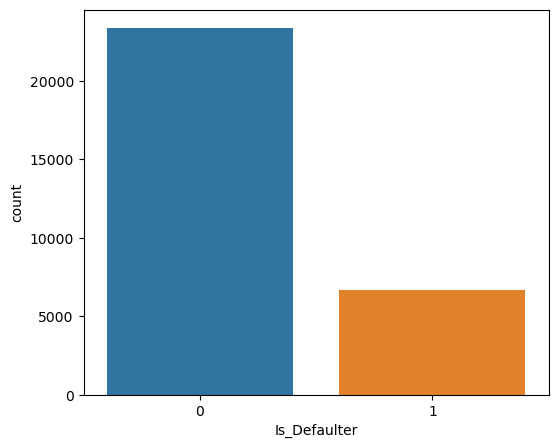

In [395]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'Is_Defaulter', data = df)

##### Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

### Balancing Imbalanced Data

The target variable **Is_Defaulter** has significant class imbalance, we will apply the *SMOTE (Synthetic Minority Oversampling Technique)**

**SMOTE** is an oversampling technique used to handle imbalanced datasets by generating synthetic samples for the minority class instead of duplicating existing ones.

**Key Features :**
* Reduces overfitting compared to random oversampling.
* Improves classification performance on imbalanced datasets.
* Commonly used in fraud detection, medical diagnosis, and NLP tasks.


In [411]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

X = df.drop('Is_Defaulter', axis=1) # features excluding the target
y = df['Is_Defaulter'] # Target Column

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns = X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns =['Is_Defaulter'])

df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

print(df_resampled['Is_Defaulter'].value_counts())

Is_Defaulter
1    23364
0    23364
Name: count, dtype: int64


##### **now the target column is balanced**

In [415]:
df_resampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter
0,-1.665383,0.810161,0.362311,-1.058428,-1.505599,1.662431,1.615503,-0.683908,-0.653252,-1.761424,-1.700769,-0.654786,-0.666975,-0.703133,-0.708335,-0.705134,-0.656065,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825,1
1,-0.090364,0.810161,0.362311,0.864100,-1.134225,-0.889837,1.615503,0.259846,0.305873,0.340968,1.785357,-0.679304,-0.700056,-0.655283,-0.624273,-0.604623,-0.580055,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020,1
2,-0.396704,0.810161,0.362311,0.864100,0.016042,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,-0.239392,-0.451718,-0.445706,-0.405640,-0.358103,-0.343748,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487,0
3,-0.953920,0.810161,0.362311,-1.058428,0.349978,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,0.017236,0.089416,0.119568,-0.161996,-0.098021,-0.097838,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121,0
4,-0.953920,-1.234323,0.362311,-1.058428,1.862737,-0.889837,0.234774,-0.683908,0.305873,0.340968,0.360884,-0.568415,-0.611116,-0.082447,-0.287765,-0.277290,-0.279323,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,1.810442,0.810161,0.362311,-1.058428,2.033883,0.749065,-0.715309,-0.683908,-0.653252,-0.632588,-0.593653,-0.714330,-0.715251,-0.669968,-0.660287,-0.673441,-0.635799,-0.189217,-0.078163,-0.054541,-0.073169,-0.324987,0.203530,1
46724,-1.374387,-1.234323,-1.218546,0.864100,-1.690995,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,-0.300159,-0.248699,-0.382726,-0.385730,-0.382547,-0.380047,-0.128633,0.064286,-0.257492,-0.207403,-0.278971,-0.223131,1
46725,0.909727,-1.234323,-1.218546,0.077333,0.862618,1.362031,1.615503,1.638454,1.710115,1.794684,1.785357,1.407673,1.568669,1.578537,1.933354,2.105160,2.221568,1.019534,-1.705383,1.457350,0.899903,0.900573,0.878947,1
46726,0.770133,0.810161,0.362311,0.864100,0.016042,-0.889837,-0.715309,-0.683908,-0.653252,-0.632588,-0.593653,-0.672256,-0.671276,-0.636522,-0.622287,-0.603144,-0.582882,0.346691,0.439906,0.492648,0.553306,0.508623,0.162311,1


In [441]:
# Print the resampled data shape
print("\nResampled Data Shape:")
print( df_resampled.shape)


Resampled Data Shape:
(46728, 24)


### Split Data into Training and Testing Sets

In [446]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [450]:
 #Print the shape of the training and testing data
print("Training Data Shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting Data Shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Data Shape:
X_train: (37382, 23)
y_train: (37382,)

Testing Data Shape:
X_test: (9346, 23)
y_test: (9346,)


### Feature Selection

**Feature selection** is the process of choosing the most relevant features from a dataset to improve model performance, reduce overfitting, and enhance interpretability. It helps in dimensionality reduction, making models more efficient and faster.

**1. SelectKBest:** 
SelectKBest is a feature selection method in scikit-learn that selects the top k features based on their scores using a specified statistical test. It helps improve model performance by removing irrelevant features.

2. **mutual_info_classif:**
mutual_info_classif is a scoring function that measures the mutual information (MI) between each feature and the target variable. It captures non-linear relationships, making it useful for classification tasks.

In [460]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Calculate mutual information scores
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X_train, y_train)

# Get mutual information scores
mutual_info_scores = selector.scores_

# Print mutual information scores
print("Mutual Information Scores:")
for feature, score in zip(X_train.columns, mutual_info_scores):
    print(f"{feature}: {score:.3f}")

# Sort mutual information scores in descending order
sorted_scores = sorted(zip(X_train.columns, mutual_info_scores), key=lambda x: x[1], reverse=True)

# Select top 12 features
top_12_features = [feature for feature, score in sorted_scores[:12]]

print("\nTop 12 Features:")
print(top_12_features)

Mutual Information Scores:
LIMIT_BAL: 0.294
SEX: 0.012
EDUCATION: 0.069
MARRIAGE: 0.014
AGE: 0.310
PAY_1: 0.146
PAY_2: 0.095
PAY_3: 0.073
PAY_4: 0.071
PAY_5: 0.069
PAY_6: 0.067
BILL_AMT1: 0.014
BILL_AMT2: 0.015
BILL_AMT3: 0.011
BILL_AMT4: 0.016
BILL_AMT5: 0.016
BILL_AMT6: 0.014
PAY_AMT1: 0.078
PAY_AMT2: 0.073
PAY_AMT3: 0.072
PAY_AMT4: 0.071
PAY_AMT5: 0.071
PAY_AMT6: 0.074

Top 12 Features:
['AGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_AMT1', 'PAY_AMT6', 'PAY_3', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_4', 'PAY_AMT5']


### Insights

*From the mutual information scores:*

* **AGE, LIMIT_BAL, PAY_1 and PAY_2 are strongly dependent on the target variable.**